In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
file_path='/content/drive/MyDrive/Zomato data .csv'

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
 #Load the Dataset
 zomato_data = pd.read_csv(file_path)

In [8]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
#Clean and Prepare the Data
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [10]:
zomato_data['rate'] = zomato_data['rate'].astype(str).apply(lambda x: x.split('/')[0].strip())
zomato_data['rate'] = zomato_data['rate'].replace('NEW', np.nan)
zomato_data['rate'] = zomato_data['rate'].replace('-', np.nan)
zomato_data['rate'] = zomato_data['rate'].astype(float)

In [12]:
zomato_data.isnull().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


In [13]:
zomato_data.dropna(subset=['rate'], inplace=True)
zomato_data.reset_index(drop=True, inplace=True)

In [14]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [15]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [16]:
#Data Analysis and Visualization

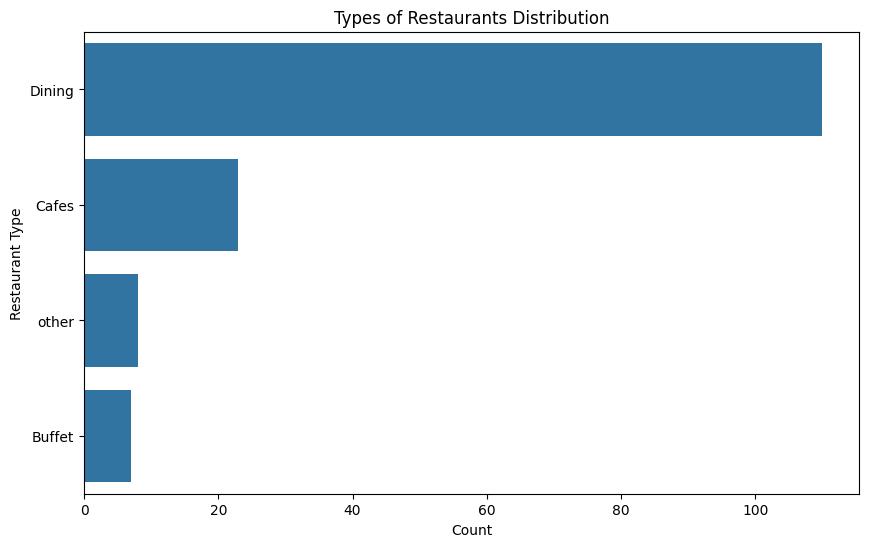

Types of Restaurants:
 Dining, Cages and Buffets


In [34]:
#Types of Restaurant
plt.figure(figsize=(10, 6))
sns.countplot(y='listed_in(type)', data=zomato_data, order=zomato_data['listed_in(type)'].value_counts().index)
plt.title('Types of Restaurants Distribution')
plt.xlabel('Count')
plt.ylabel('Restaurant Type')
plt.show()
print("Types of Restaurants:\n Dining, Cages and Buffets")

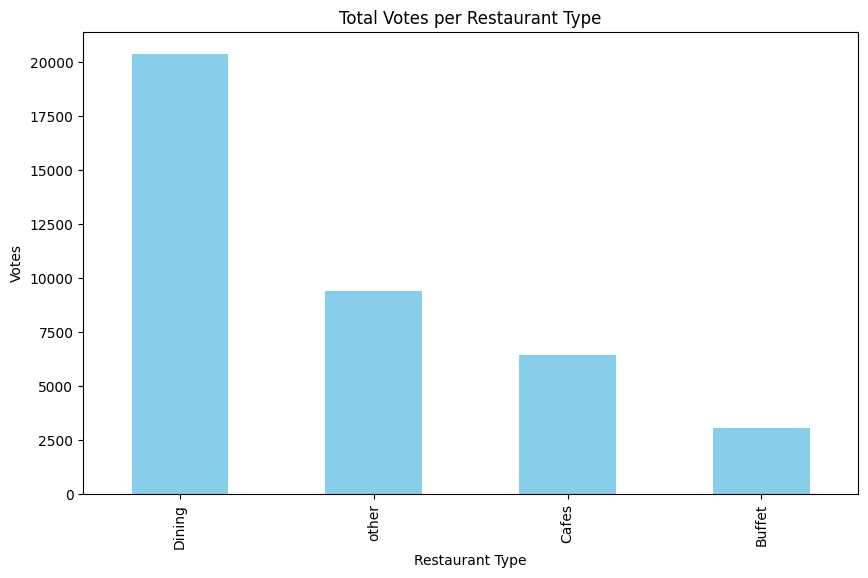

Dining type of restaurant has most number of votes.


In [35]:
# Votes by Restaurant Type
votes_by_type = zomato_data.groupby('listed_in(type)')['votes'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
votes_by_type.plot(kind='bar', color='skyblue')
plt.title('Total Votes per Restaurant Type')
plt.ylabel('Votes')
plt.xlabel('Restaurant Type')
plt.xticks(rotation=90)
plt.show()
print("Dining type of restaurant has most number of votes.")

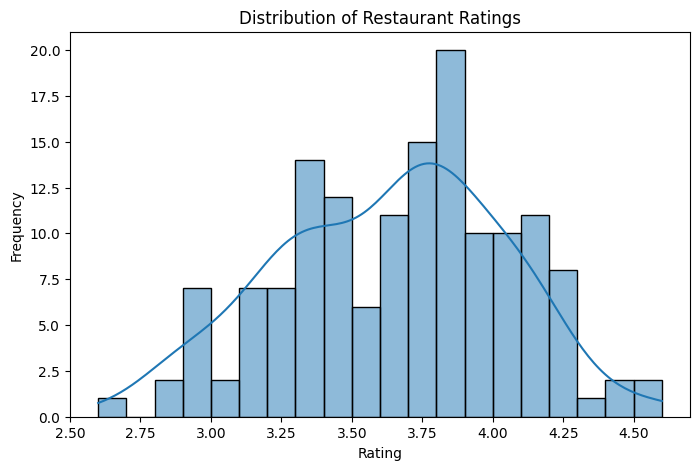

Most ratings of the restaurants has been between 3.75 and 4.


In [36]:
# Ratings Distribution
plt.figure(figsize=(8, 5))
sns.histplot(zomato_data['rate'], bins=20, kde=True)
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()
print("Most ratings of the restaurants has been between 3.75 and 4.")

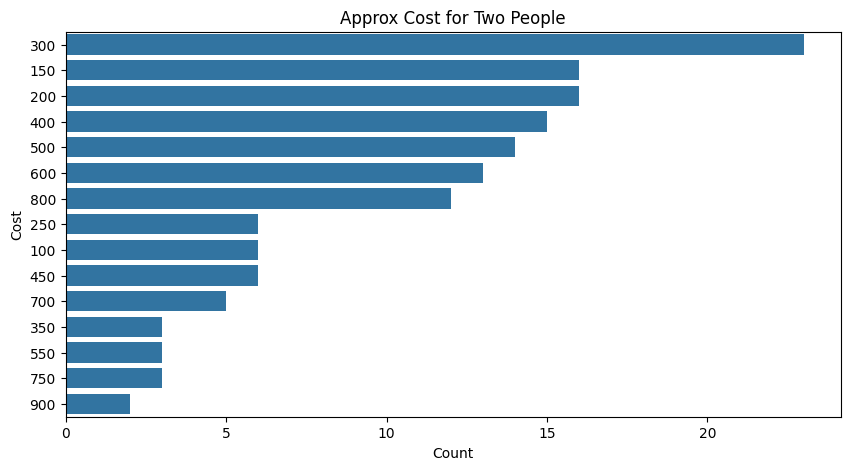

In [21]:
# Restaurant Cost Preference for Couples
plt.figure(figsize=(10, 5))
sns.countplot(y='approx_cost(for two people)', data=zomato_data, order=zomato_data['approx_cost(for two people)'].value_counts().index[:15])
plt.title('Approx Cost for Two People')
plt.xlabel('Count')
plt.ylabel('Cost')
plt.show()

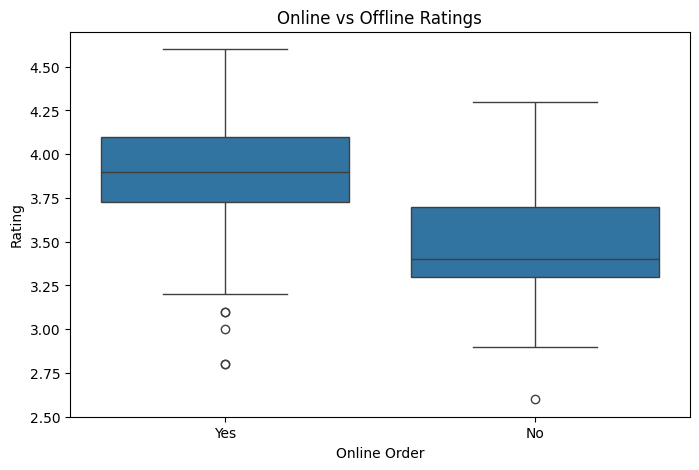

Mostly ratings has been given online it can be concluded from this plot.


In [37]:
# Online vs. Offline Ratings
plt.figure(figsize=(8, 5))
sns.boxplot(x='online_order', y='rate', data=zomato_data)
plt.title('Online vs Offline Ratings')
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.show()
print("Mostly ratings has been given online it can be concluded from this plot.")

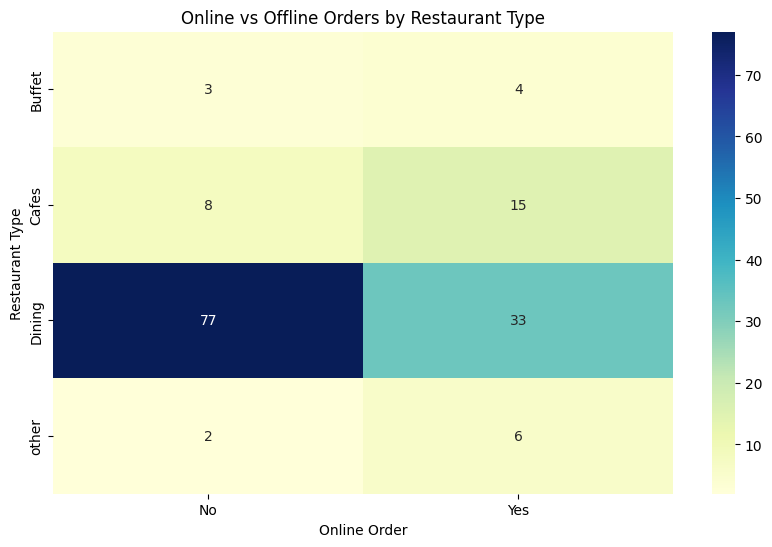

In [23]:
# Online Orders by Restaurant Type
pivot = pd.pivot_table(zomato_data, index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Online vs Offline Orders by Restaurant Type')
plt.ylabel('Restaurant Type')
plt.xlabel('Online Order')
plt.show()

In [24]:
#Insights
#What type of restaurant do the majority of customers order from?
most_common_type = zomato_data['listed_in(type)'].value_counts().idxmax()

In [25]:
#How many votes has each type of restaurant received from customers?
votes_by_type

,votes
listed_in(type),
Dining,20363
other,9367
Cafes,6434
Buffet,3028


In [26]:
# What are the ratings that the majority of restaurants have received?
rating_range = zomato_data['rate'].between(3.5, 4.0).sum()

In [27]:
# Zomato has observed that most couples order most of their food online. What is their average spending on each other?
avg_cost_online = zomato_data[zomato_data['online_order'] == 'Yes']['approx_cost(for two people)'].replace(',', '', regex=True).astype(float).mean()

In [28]:
# Which mode ( online or offline ) has received the maximum rating?
online_rating = zomato_data[zomato_data['online_order'] == 'Yes']['rate'].mean()
offline_rating = zomato_data[zomato_data['online_order'] == 'No']['rate'].mean()


In [29]:
# Which type received more offline orders, so that Zomato can provide those customers with some good offers?
offline_orders = pivot['No'].sort_values(ascending=False)

In [31]:
print("1. Most common restaurant type:", most_common_type)
print("2. Total votes per restaurant type:\n", votes_by_type)
print("3. Number of restaurants rated between 3.5 and 4.0:", rating_range)
print("4. Avg spending by online-ordering couples:", round(avg_cost_online, 2))
print("5. Avg rating (Online):", round(online_rating, 2))
print("   Avg rating (Offline):", round(offline_rating, 2))
print("6. Type with most offline orders:\n", offline_orders.head())

1. Most common restaurant type: Dining
2. Total votes per restaurant type:
 listed_in(type)
Dining    20363
other      9367
Cafes      6434
Buffet     3028
Name: votes, dtype: int64
3. Number of restaurants rated between 3.5 and 4.0: 72
4. Avg spending by online-ordering couples: 510.34
5. Avg rating (Online): 3.86
   Avg rating (Offline): 3.49
6. Type with most offline orders:
 listed_in(type)
Dining    77
Cafes      8
Buffet     3
other      2
Name: No, dtype: int64
